In [46]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 


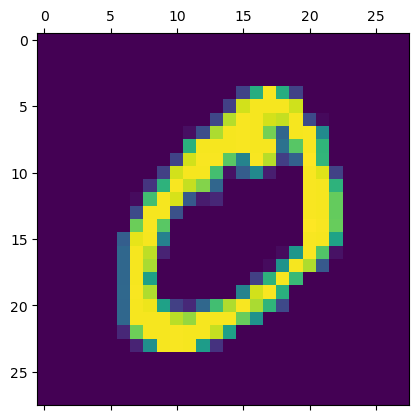

In [11]:
plt.matshow(x_train[1])

In [30]:
x_train_flattern = x_train.reshape(len(x_train), 28 * 28)
x_test_flattern = x_test.reshape(len(x_test), x_test[0].shape[0] * x_test[0].shape[0])
x_train_flattern = x_train_flattern / 255
x_test_flattern = x_test_flattern / 255

In [31]:
model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
    ]
)
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)
model.fit(x_train_flattern, y_train, epochs = 5)

/Users/spaceconsole/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8085 - loss: 0.7328
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9116 - loss: 0.3124
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9197 - loss: 0.2840
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9245 - loss: 0.2711
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9267 - loss: 0.2654


In [51]:
model.evaluate(x_test_flattern, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9711 - loss: 0.0903   


[0.07677597552537918, 0.9753000140190125]

In [36]:
preds = model.predict(x_test_flattern)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step


<Axes: >

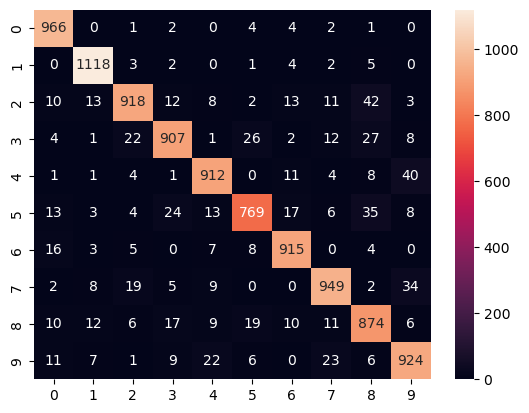

In [49]:
y_pred = np.argmax(preds, axis = 1)
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d')

In [50]:
model = keras.Sequential(
    [
        keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
        keras.layers.Dense(10, activation = 'sigmoid')
    ]
)
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)
model.fit(x_train_flattern, y_train, epochs = 5)

/Users/spaceconsole/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8748 - loss: 0.4460
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9626 - loss: 0.1278
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9750 - loss: 0.0821
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9816 - loss: 0.0611
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9849 - loss: 0.0487


In [52]:
model.evaluate(x_test_flattern, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9711 - loss: 0.0903 


[0.07677597552537918, 0.9753000140190125]

In [53]:
preds = model.predict(x_test_flattern)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


<Axes: >

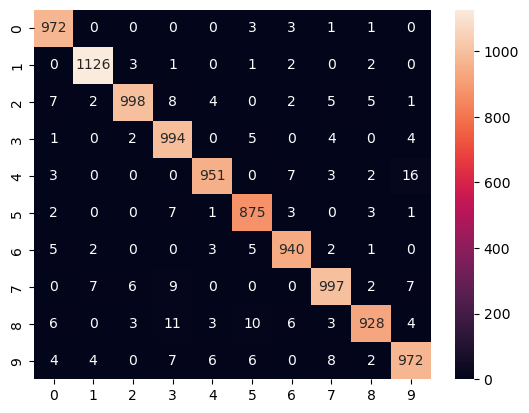

In [54]:
y_pred = np.argmax(preds, axis = 1)
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d')

In [61]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape = (28, 28)),
        keras.layers.Dense(100, activation = 'relu'),
        keras.layers.Dense(10, activation = 'sigmoid')
    ]
)
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4813 - loss: 7.2172 
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5911 - loss: 0.4685
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5584 - loss: 0.3139
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5171 - loss: 0.2466
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5051 - loss: 0.2152
